<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW3Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

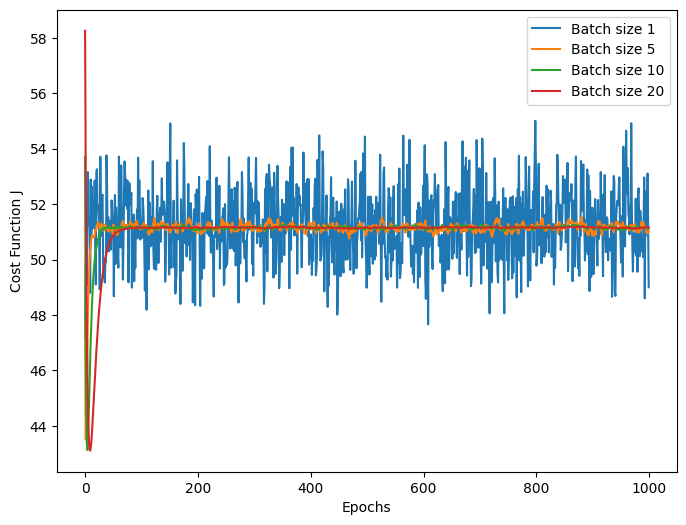

In [4]:
#HW3 Question 2
import numpy as np
import matplotlib.pyplot as plt

# Load housing dataset
housing_data = np.loadtxt('/content/Housing_prices.txt', delimiter=',')
X = housing_data[:, 0:1]  # Population
y = housing_data[:, 1]    # Price

# Normalize data
X = (X - X.mean()) / X.std()

# Add bias term (X0 = 1) for all samples
X = np.c_[np.ones((X.shape[0], 1)), X]  # Shape becomes (m, 2)

# Define mini-batch gradient descent function
def minibatch_gd(X, y, alpha=0.01, epochs=1000, batch_sizes=[1,5,10,20]):
    m = len(y)
    J_history = {b: [] for b in batch_sizes}

    for batch_size in batch_sizes:
        theta = np.zeros((2, 1))  # Shape (2,1) for consistency
        for epoch in range(epochs):
            indices = np.random.permutation(m)
            X_shuffled, y_shuffled = X[indices], y[indices].reshape(-1, 1)  # Ensure y is a column vector
            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                gradient = -2 / batch_size * X_batch.T @ (y_batch - X_batch @ theta)
                theta -= alpha * gradient  # Update theta

            J_history[batch_size].append(np.mean((y - X @ theta)**2))

    return J_history

# Run mini-batch GD
J_history = minibatch_gd(X, y)

# Plot cost function
plt.figure(figsize=(8,6))
for batch_size, J_vals in J_history.items():
    plt.plot(J_vals, label=f'Batch size {batch_size}')
plt.xlabel('Epochs')
plt.ylabel('Cost Function J')
plt.legend()
plt.show()